In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Example on how to get data into the notebook with a csv file:
df = pd.read_csv('example_data.csv')

In [56]:
class BlandAltman():
    
    def __init__(self,gold_std,new_measure,averaged=False):
        # set averaged to True if multiple observations from each participant are averaged together to get one value
        import pandas as pd
        
        # Check that inputs are list or pandas series, convert to series if list
        if isinstance(gold_std,list):
            df = pd.DataFrame() # convert to pandas series
            df['gold_std'] = gold_std
            gold_std = df.gold_std
        elif not isinstance(gold_std,pd.Series):
            print('Error: Data type of gold_std is not a list or a Pandas series')
            
        if isinstance(new_measure,list):
            df2 = pd.DataFrame() # convert to pandas series
            df2['new_measure'] = new_measure
            new_measure = df2.new_measure
        elif not isinstance(new_measure,pd.Series):
            print('Error: Data type of new_measure is not a list or a Pandas series')
            
        self.gold_std = gold_std
        self.new_measure = new_measure
        
        # Calculate Bland-Altman statistics
        diffs = gold_std - new_measure
        self.mean_error = diffs.mean()
        self.mean_absolute_error = diffs.abs().mean() 
        r = np.corrcoef(self.gold_std,self.new_measure)
        self.correlation = r[0,1]  # correlation coefficient
        diffs_std = diffs.std()    # 95% Confidence Intervals
        corr_std = np.sqrt(2*(diffs_std**2)) # if observations are averaged, used corrected standard deviation
        if averaged:
            self.CI95 = [self.mean_error + 1.96 * corr_std, self.mean_error - 1.96 * corr_std]
        else:
            self.CI95 = [self.mean_error + 1.96 * diffs_std, self.mean_error - 1.96 * diffs_std]
        
    def print_stats(self):
        print("Mean error = {}".format(self.mean_error))
        print("Mean absolute error = {}".format(self.mean_absolute_error))
        print("Correlation = {}".format(self.correlation))
        print("+95% Confidence Interval = {}".format(self.CI95[0]))
        print("-95% Confidence Interval = {}".format(self.CI95[1]))

    def scatter_plot(self,x_label='Gold Standard',y_label='New Measure',
                    figure_size=(4,4), show_legend=True,
                    the_title=' ', 
                    file_name='BlandAltman_ScatterPlot.pdf',
                    is_journal=False):
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        file_name = 'output_images/' + file_name
        
        if is_journal: # avoid use of type 3 fonts for journal paper acceptance
            import matploblib
            matplotlib.rcParams['pdf.fonttype'] = 42
            matplotlib.rcParams['ps.fonttype'] = 42

        fig = plt.figure(figsize=figure_size)
        ax=fig.add_axes([0,0,1,1])
        ax.scatter(self.gold_std,self.new_measure,label='Observations')
        x_vals = np.array(ax.get_xlim())
        ax.plot(x_vals,x_vals,'--',color='black',label='Line of Slope = 1')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(the_title)
        ax.grid()
        if show_legend:
            ax.legend()
        plt.savefig(file_name,bbox_inches='tight')
        
    def difference_plot(self,x_label='Difference between methods',
                        y_label='Average of two methods',averaged=False,
                        figure_size=(4,4),show_legend=True,
                        the_title='',file_name='BlandAltman_DifferencePlot.pdf',
                        is_journal=False):
        
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        file_name = 'output_images/' + file_name
        
        if is_journal: # avoid use of type 3 fonts for journal paper acceptance
            import matploblib
            matplotlib.rcParams['pdf.fonttype'] = 42
            matplotlib.rcParams['ps.fonttype'] = 42
        
        diffs = self.gold_std - self.new_measure
        avgs = (self.gold_std + self.new_measure) / 2
        
        fig = plt.figure(figsize=figure_size)
        ax = fig.add_axes([0,0,1,1])
        ax.scatter(avgs,diffs,label='Observations')
        x_vals = np.array(ax.get_xlim())
        ax.axhline(self.mean_error,color='black',label='Mean Error')
        ax.axhline(self.CI95[0],color='black',linestyle='--',label='+95% Confidence Interval')
        ax.axhline(self.CI95[1],color='black',linestyle='--',label='-95% Confidence Interval')
        ax.set_ylabel(x_label)
        ax.set_xlabel(y_label)
        ax.set_title(the_title)
        if show_legend:
            ax.legend()
        ax.grid()
        plt.savefig(file_name,bbox_inches='tight')
        

In [57]:
compare = BlandAltman(df.gold_standard,df.new_measure,averaged=True)

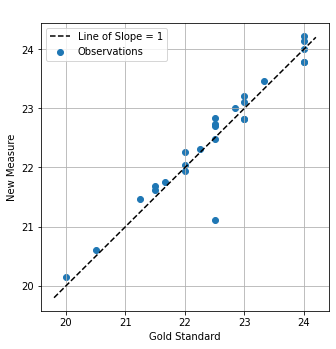

In [52]:
compare.scatter_plot()

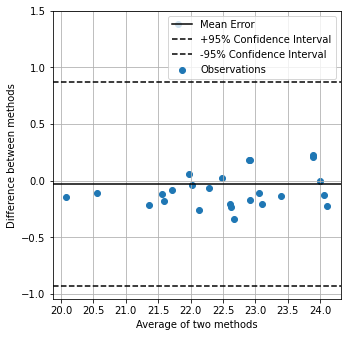

In [58]:
compare.difference_plot()

In [28]:
compare.print_stats()

Mean error = -0.026976496538461483
Mean absolute error = 0.2008012819230771
Correlation = 0.9533691458368615
+95% Confidence Interval = 0.6104613148594579
-95% Confidence Interval = -0.6644143079363808
